In [1]:
%pylab inline
from gplearn.genetic import SymbolicRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.utils.random import check_random_state
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import graphviz

Populating the interactive namespace from numpy and matplotlib


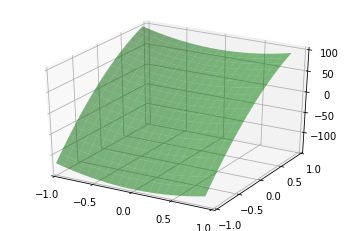

In [2]:
x0 = np.arange(-1, 1, .1)
x1 = np.arange(-1, 1, .1)
x0, x1 = np.meshgrid(x0, x1)
y_truth = 25*(x0**2) - 31*(x1**2) + 113*x1 - 1

ax = plt.figure().gca(projection='3d')
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_xticks(np.arange(-1, 1.01, .5))
ax.set_yticks(np.arange(-1, 1.01, .5))
surf = ax.plot_surface(x0, x1, y_truth, rstride=1, cstride=1, color='green', alpha=0.5)
plt.show()


In [3]:
rng = check_random_state(0)

# Training samples
X_train = rng.uniform(-1, 1, 100).reshape(50, 2)
y_train = 25*X_train[:, 0]**2 - 31*X_train[:, 1]**2 + 113*X_train[:, 1] - 1

# Testing samples
X_test = rng.uniform(-1, 1, 100).reshape(50, 2)
y_test = 25*X_test[:, 0]**2 - 31*X_test[:, 1]**2 + 113*X_test[:, 1] - 1

In [4]:

est_gp = SymbolicRegressor(population_size=5000,
                           generations=20, stopping_criteria=0.01,
                           p_crossover=0.7, p_subtree_mutation=0.1,
                           p_hoist_mutation=0.05, p_point_mutation=0.1,
                           max_samples=0.9, verbose=1,
                           parsimony_coefficient=0.01, random_state=0)
est_gp.fit(X_train, y_train)



    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    38.13          514.876       23          22.6653          19.6983      2.60m
   1    28.15          76.7097       23          20.9566          24.9519      1.63m
   2    37.17          69.6216       47          11.6187          20.7708      1.69m
   3    30.04          77.9567       37          8.15832          15.0587      1.55m
   4    28.25          74.9772       37          8.13058          16.0373      1.37m
   5    31.90          78.1282       39          6.40368          10.4202      1.35m
   6    27.50          97.9212       45          6.51428          8.09339      1.27m
   7    27.63          137.584       39          4.94508          5.37703      1.15m
   8    34.73          141.161       39          4.80791           6.6116  

SymbolicRegressor(const_range=(-1.0, 1.0), feature_names=None,
                  function_set=('add', 'sub', 'mul', 'div'), generations=20,
                  init_depth=(2, 6), init_method='half and half',
                  low_memory=False, max_samples=0.9,
                  metric='mean absolute error', n_jobs=1, p_crossover=0.7,
                  p_hoist_mutation=0.05, p_point_mutation=0.1,
                  p_point_replace=0.05, p_subtree_mutation=0.1,
                  parsimony_coefficient=0.01, population_size=5000,
                  random_state=0, stopping_criteria=0.01, tournament_size=20,
                  verbose=1, warm_start=False)

In [5]:
print(est_gp._program)


sub(add(sub(sub(mul(sub(X0, X1), add(X0, X1)), div(X1, -0.012)), add(0.813, sub(-0.851, add(sub(X1, div(X1, -0.239)), mul(mul(sub(X1, 0.261), add(sub(add(mul(sub(X0, X1), add(X0, X1)), X1), div(X1, -0.239)), add(add(-0.012, add(sub(-0.368, 0.664), X1)), X1))), sub(-0.368, 0.664)))))), X1), div(add(add(-0.012, add(mul(sub(X0, X1), add(X0, X1)), X1)), mul(sub(X0, X1), sub(X0, X0))), -0.044))
